<a href="https://colab.research.google.com/github/Sarahelkadyy/-effective-train/blob/main/Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name:Sarah Elkady

ID:58-7504

Tutorial:7

---

Name:Sayed Ahmed

ID:58-6932

Tutorial:7


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

## Importing Libraries & Dataset

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Scikit-learn (preprocessing, clustering, evaluation, PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Text processing / helpers
from collections import Counter
import re


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Optional for visualization of clusters
from sklearn.decomposition import PCA
from collections import Counter





In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In this step we load the dataset containing the music genres. Then we preview the data using df.head(). It displays the the first five rows to give us an understanding of the dataset.

## Data Inspection

In [93]:
# Display first 5 rows
df.head()


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


Once again we display the first five rows for the Data Inspection phase

In [94]:
# Get general information about the dataset: column names, types, non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


I run df.info() to check the dataset. It shows 2972 rows and 13 columns. All columns have no missing values. Most columns are numeric which works for clustering. The genres column is the only text column. This step tells me the data is complete and ready for the next steps.

In [95]:
# Summary statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
acousticness,2972.0,0.401157,0.319781,0.000003,0.119036,0.321706,0.674088,9.960000e-01
danceability,2972.0,0.537190,0.150693,0.056900,0.441169,0.546511,0.647536,9.290000e-01
duration_ms,2972.0,251727.193751,94672.153684,30946.000000,206367.384615,237547.875175,277300.839338,2.382587e+06
energy,2972.0,0.561190,0.234511,0.001002,0.395030,0.601264,0.730202,9.946667e-01
instrumentalness,2972.0,0.211368,0.267374,0.000000,0.004829,0.080663,0.343333,9.920000e-01
liveness,2972.0,0.192791,0.092370,0.022200,0.137682,0.178752,0.220858,9.600000e-01
loudness,2972.0,-10.509249,5.370006,-41.825000,-12.428814,-9.219409,-6.919969,6.000000e-02
speechiness,2972.0,0.083580,0.080495,0.023800,0.044900,0.059432,0.091000,9.462187e-01
tempo,2972.0,119.020796,17.471762,47.135722,109.191107,119.199333,127.510813,2.042120e+02
valence,2972.0,0.492741,0.201853,0.003353,0.348558,0.499936,0.640380,9.800000e-01


We use df.describe().T to view the data' statistics for all numeric columns. We see the count mean and spread and min and max values. This helps us understand the range of each feature and how the data in it behave. For example popularity goes from 0 to around 80 and loudness is mostly negative. These summarzes guide our later steps in scaling, correlations and clustering.

In [96]:
# Check categorical columns unique values (if any)
categorical_cols = ['genres']  # replace/add other categorical columns if exist

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()[:10]} ...")  # first 10 unique values


genres unique values: ['21st century classical' '432hz' '8-bit' 'a cappella' 'abstract'
 'abstract beats' 'abstract hip hop' 'accordeon' 'accordion' 'acid house'] ...


We check the unique values inside the genres column. This helps us see how many genre types appear in the data and what the first few examples look like. We do this because genres is a categorical column, and we will use it later to interpret clusters, not for the clustering itself. This step gives us an early idea of the variety in genre names.

In [97]:
# Check for missing values in each column
df.isnull().sum()


,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


we use df.isnull().sum() to check if theres any missing values. According to the output there isnt any missing value in any of the columns. This means that we are ready to work with the dataset without adding or removing any values.

## Data Cleaning & Preprocessing



In [98]:
# --- Step 3a: Convert duration to seconds for better interpretability ---
df['duration_s'] = df['duration_ms'] / 1000
df = df.drop(columns=['duration_ms'])  # drop original column

# Check first rows
df[['genres','duration_s']].head()


,genres,duration_s
0,21st century classical,160.297667
1,432hz,1048.887333
2,8-bit,115.177000
3,a cappella,190.628541
4,abstract,343.196500


we convert the duration into seconds by dividing by 1000. After that we drop the original column in ms beacuse it is not needed anymore. This makes it easier to analyze songs length when its in seconds.

In [99]:
# --- Step 3b: Select features for clustering ---
# Exclude 'genres' (categorical) and 'popularity' (optional)
cluster_features = ['acousticness', 'danceability', 'duration_s', 'energy',
                    'instrumentalness', 'liveness', 'loudness', 'speechiness',
                    'tempo', 'valence', 'key']

X = df[cluster_features]

# Check first 5 rows
X.head()


,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key
0,0.979333,0.162883,160.297667,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,6
1,0.494780,0.299333,1048.887333,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,5
2,0.762000,0.712000,115.177000,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,7
3,0.676557,0.538961,190.628541,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,7
4,0.459210,0.516167,343.196500,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,1


Here we pick the columns we will use for clustering. We chose columns that are only numeric for anallysis. We exclude the column genres because it is text.then we create a new table containing these features and dispkay the first five rows to make sure that everything is correct.

In [100]:
# --- Step 3c: Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=cluster_features)

# Check first rows
X_scaled.head()


,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key
0,1.808342,-2.484320,-0.965911,-2.089264,1.479319,1.827840,-3.912215,-0.534445,-2.500701,-1.927254,0.018282
1,0.292822,-1.578684,8.421635,-0.471323,0.996498,-0.669062,-1.181715,-0.084032,0.072407,-1.342738,-0.278625
2,1.128597,1.160236,-1.442591,1.095268,2.486190,-0.723202,0.247574,-0.454509,0.825654,2.389557,0.315189
3,0.861361,0.011756,-0.645480,-1.043864,-0.779432,-0.222369,-0.366940,-0.009049,-0.395587,-0.220455,0.315189
4,0.181571,-0.139535,0.966332,-0.506559,2.387685,-0.809102,-0.924332,-0.460515,0.507473,-0.918720,-1.466255


We use StandardScaler to scale all selected features. We turn them into a new table X_scaled where each column has mean 0 and standard deviation 1. We then convert it back to a DataFrame and check the first rows. We do this because K-Means uses distances, and we want all features to be on a similar scale so no single feature dominates.

**Visualization**

In [101]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations of numeric features with popularity
correlations = numeric_df.corr()['popularity'].sort_values(ascending=False)
correlations


,popularity
popularity,1.000000
loudness,0.344315
energy,0.337657
danceability,0.218019
tempo,0.146617
valence,0.023117
key,0.008700
speechiness,-0.045112
duration_s,-0.071111
liveness,-0.094092


We select only numeric columns and calculate how each feature relates to popularity. We sort the values to see which features have the strongest positive or negative connection towards popularity. We see that loudness and energy have the highest positive links to popularity while acousticness has the strongest negative link. This helps us answer which factors affect popularity the most out of them all

## What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)

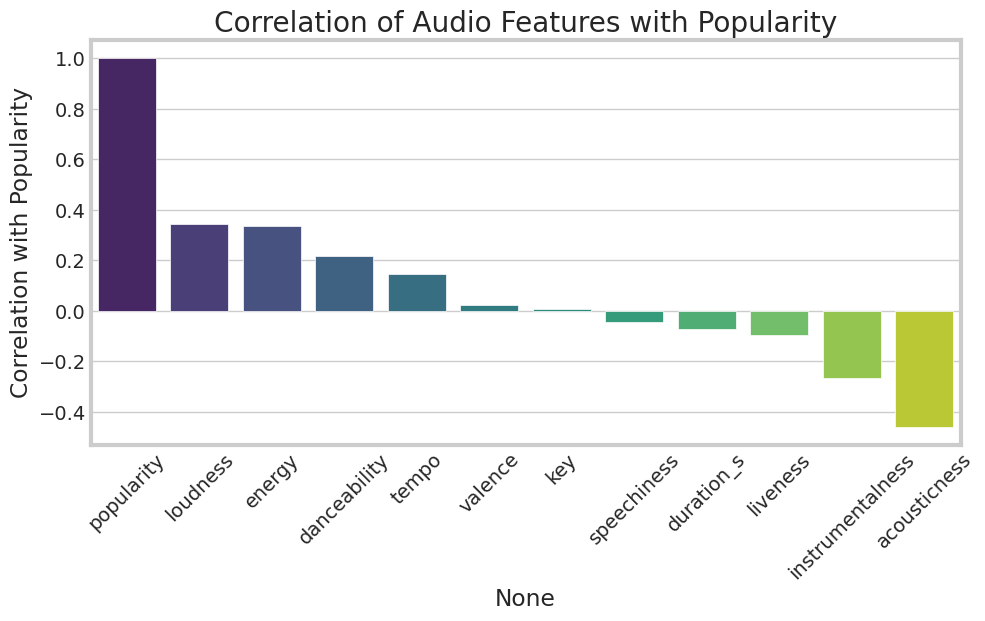

In [71]:
# Plot correlations with popularity (warning-free version)
plt.figure(figsize=(10,5))
sns.barplot(
    x=correlations.index,
    y=correlations.values,
    hue=correlations.index,
    palette='viridis',
    legend=False
)
plt.xticks(rotation=45)
plt.ylabel('Correlation with Popularity')
plt.title('Correlation of Audio Features with Popularity')
plt.show()


This bar plot show how each audio feature relates to popularity.Loudness and energy have the highest correality with popularity and instrumentalness and acousticness have the highest negative correality with popularity.

# Which genre is the most popular and which is the least?

In [72]:
# Average popularity per genre
genre_popularity = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Display top 5 and bottom 5 genres
print("Most popular genres:\n", genre_popularity.head())
print("\nLeast popular genres:\n", genre_popularity.tail())


Most popular genres:
 genres
basshall               80.666667
trap venezolano        80.000000
south african house    80.000000
turkish edm            80.000000
alberta hip hop        78.500000
Name: popularity, dtype: float64

Least popular genres:
 genres
cameroonian pop           0.0
minimal melodic techno    0.0
modern swing              0.0
middle east hip hop       0.0
zambian pop               0.0
Name: popularity, dtype: float64


Here we calculate the average popularity per genre and rank them in ascending order. The most popular genre is basshall while the least popular genre is a group of genres with popularity with 0 which are cameeronian pop, minimal melodic techno, modern swing, middle east hip hop, and zambizn pop.

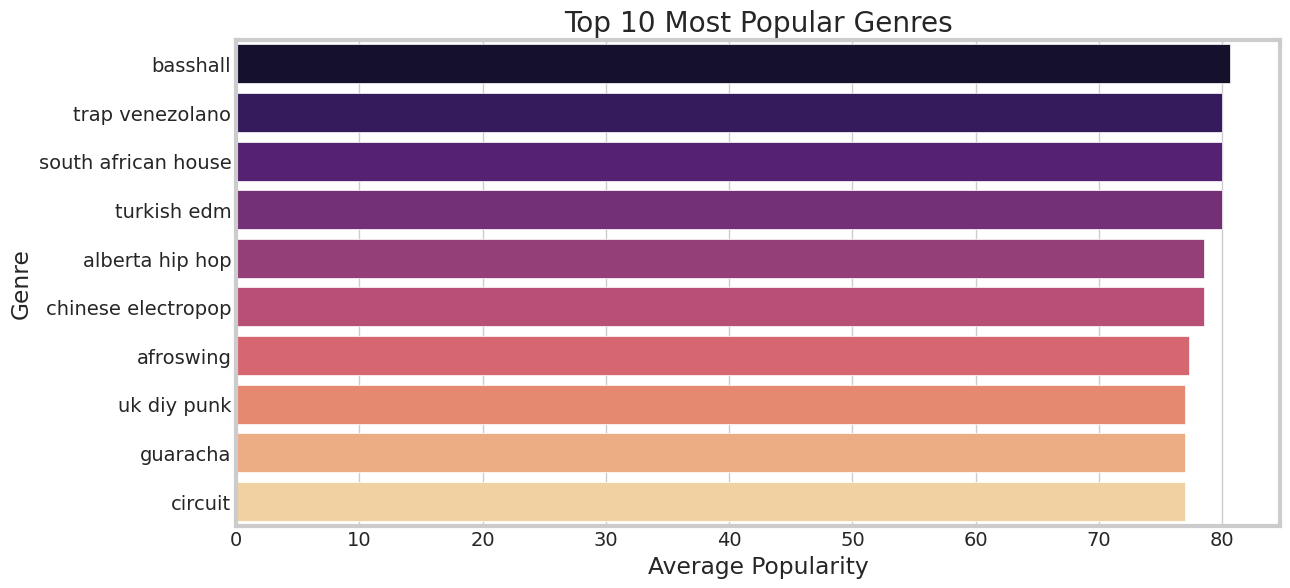

In [73]:
# Plot top 10 genres by popularity
top10 = genre_popularity.head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top10.values,
    y=top10.index,
    hue=top10.index,
    palette='magma',
    legend=False
)
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Genres')
plt.show()


The top 10 genres in our dataset are:

1-basshall

2-trap venezolano

3-south african house

4-turkish edm

5-alberta hip hop

6-chinese electropop

7-afroswing

8-uk diy punk

9-guaracha

10-circuit

# What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)

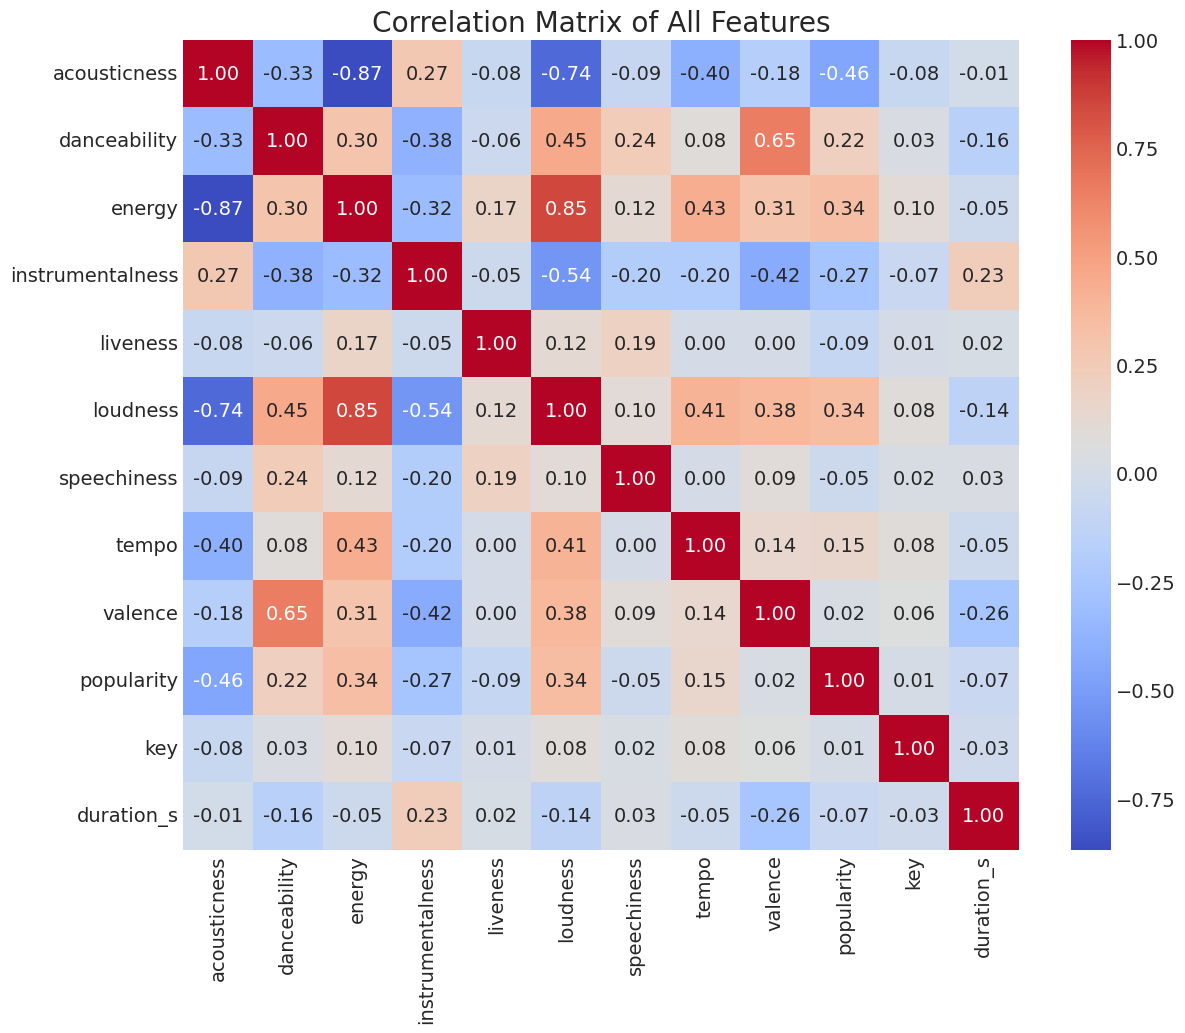

In [74]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()


There are two pairs with the strongest correlation. First, energy and loudness have a strong positive correlation meaning that when the energy of a song increases the loudness also increases. High energy songs are usually loud so it makes sense. Second, danceability and valence also have a strong positive correlation. This also makes sense because upbeat songs are usually danceable and emotionally positive.

In [75]:
import numpy as np

# Remove self-correlations
corr_no_self = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))

# Convert to Series of all pairs
corr_pairs = corr_no_self.unstack().dropna()

# Keep only one of each pair (A-B but not B-A)
unique_pairs = corr_pairs.groupby(lambda x: tuple(sorted(x))).mean()

# Sort descending and take top 2
top_pairs = unique_pairs.sort_values(ascending=False).head(2)

top_pairs


,0
"(energy, loudness)",0.848966
"(danceability, valence)",0.652549


This just cements the above chart and its interpretation. The strongest correlations between the attributes are (energy and loudness) and (danceability and valence).

# Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at least 3)

In [76]:
from collections import Counter
import re

# Split genre names into words
all_words = []
for genre in df['genres']:
    words = re.findall(r'\w+', genre.lower())  # lowercase, remove punctuation
    all_words.extend(words)

# Count frequency of each word
word_counts = Counter(all_words)

# Show 10 most common words
word_counts.most_common(10)


[('pop', 252),
 ('indie', 238),
 ('rock', 200),
 ('metal', 135),
 ('classical', 107),
 ('hop', 103),
 ('hip', 102),
 ('jazz', 98),
 ('folk', 83),
 ('punk', 79)]

Here we look at the most 10 common words that appear inside the genre names. The top 3 names are pop, indie, and rock. This tells us that a lot of genres belong to that group of music. We also see words like metal, classical, jazz, folk, and punk. This also tells us that many traditional and modern music styles. lastly hip and hop appear sepretaly but together show a strong prescence.

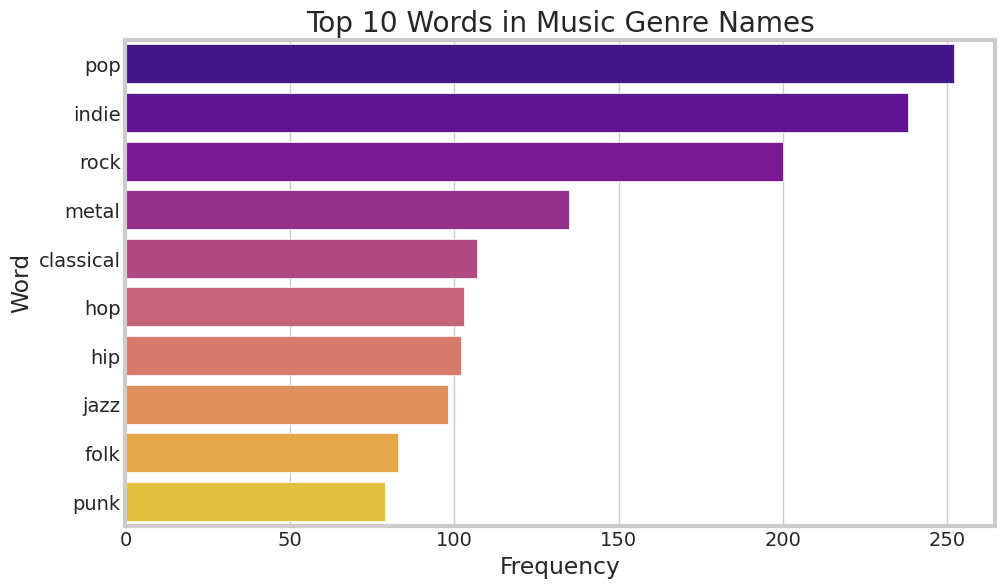

In [77]:
# Barplot of top 10 words in genres (warning-free)
top_words = dict(word_counts.most_common(10))

plt.figure(figsize=(10,6))
sns.barplot(
    x=list(top_words.values()),
    y=list(top_words.keys()),
    hue=list(top_words.keys()),
    palette='plasma',
    legend=False
)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Words in Music Genre Names')
plt.show()


first Pop It appears the most .this tells us that many sub-genres include pop in their names

second Indie A very large number of genres use indie as a base label. this shows strong variation inside the indie category.

third Rock appears in many sub genre names this reflects the huge diversity within rock music

#Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data relationship or finding. Provide a short explanation of the insight and its relevance.

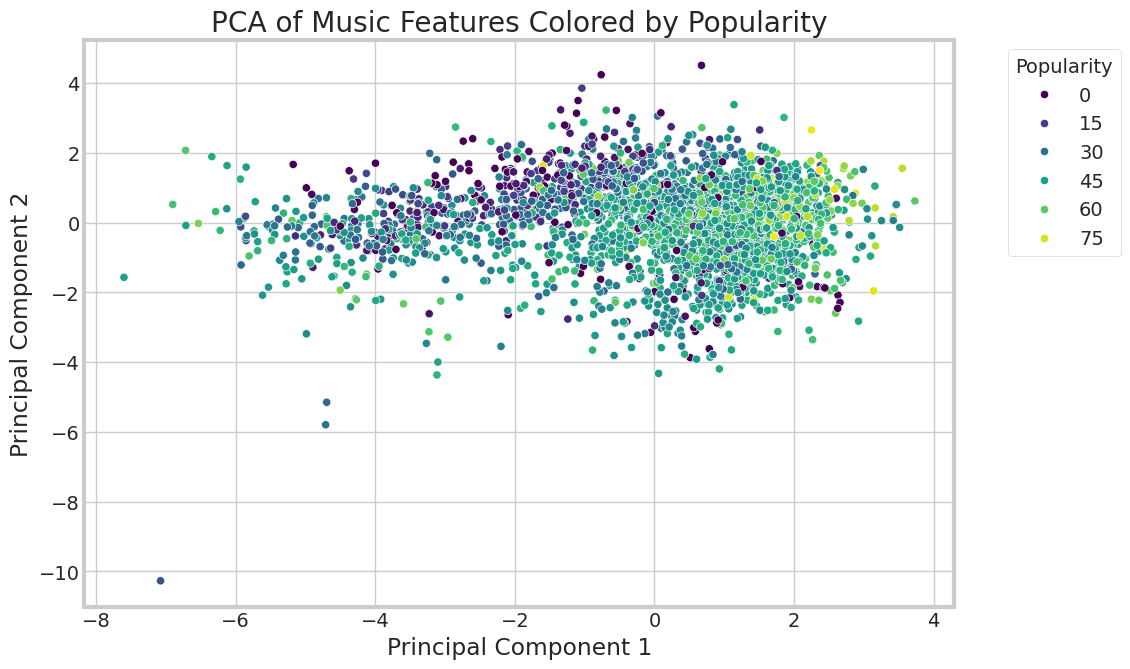

In [78]:
from sklearn.decomposition import PCA

# Reduce scaled features to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe for plotting
df_pca = df.copy()
df_pca['PC1'] = X_pca[:,0]
df_pca['PC2'] = X_pca[:,1]


# Scatter plot colored by popularity
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue='popularity', palette='viridis', data=df_pca)
plt.title('PCA of Music Features Colored by Popularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Popularity', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


We used a new visualization which is the PCA. When we color by popularity, we see that many popular songs appear on the right side of the plot. less popular songs are more spread out. This means popular songs share a similar mix of features. this pattern only appears when we look at all features together

# Select and justify the appropriate parameter values for the clustering algorithm, while clearly explaining the method used to find these values.

## Data Preparation for Modelling

In [79]:
#Select Features for Clustering

#We will use only numeric audio features (distance-based clustering requires numeric data):

# Features to use for clustering
features = ['acousticness', 'danceability', 'duration_s', 'energy',
            'instrumentalness', 'liveness', 'loudness', 'speechiness',
            'tempo', 'valence', 'key']

X = df[features]
X.head()

,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key
0,0.979333,0.162883,160.297667,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,6
1,0.494780,0.299333,1048.887333,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,5
2,0.762000,0.712000,115.177000,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,7
3,0.676557,0.538961,190.628541,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,7
4,0.459210,0.516167,343.196500,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,1


In [80]:
#Scale Features

#K-Means is distance-based, so features must be on a similar scale:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Modelling

In [81]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans and predict cluster labels
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels
df.head()


,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,duration_s,Cluster
0,21st century classical,0.979333,0.162883,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,160.297667,1
1,432hz,0.494780,0.299333,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,1048.887333,1
2,8-bit,0.762000,0.712000,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,115.177000,0
3,a cappella,0.676557,0.538961,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,190.628541,3
4,abstract,0.459210,0.516167,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1,343.196500,1


# Display a random sample of at least 5 genres from each cluster group.

In [82]:
# Display 5 random genres from each cluster
for i in range(5):
    print(f"\nCluster {i}:")
    display(df[df['Cluster']==i]['genres'].sample(5, random_state=42))



Cluster 0:


,genres
2406,salsa choke
212,banda
2660,swiss pop
1607,kompa
2090,ottawa rap



Cluster 1:


,genres
420,canadian choir
1410,irish classical
2829,university choir
187,avant-garde jazz
227,baroque brass



Cluster 2:


,genres
908,dusseldorf electronic
2124,philly indie
851,depressive black metal
1030,finnish death metal
1966,no wave



Cluster 3:


,genres
2393,russian punk
425,canadian contemporary r&b
1224,greek pop
2623,swedish electronic
2369,roots americana



Cluster 4:


,genres
1163,german literature
1648,latino comedy
248,beat poetry
1835,motivation
1240,guidance


In [83]:
# Centroids in scaled space
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)

# Optional: convert centroids back to original scale
centroids_original = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids_original


,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key
0,0.243193,0.672863,237.954057,0.667948,0.068984,0.176905,-7.775448,0.102524,119.617618,0.653375,5.858171
1,0.848082,0.333703,301.828657,0.190432,0.597329,0.162089,-20.699978,0.051797,104.797875,0.231373,4.977778
2,0.115334,0.478242,265.165947,0.771154,0.239304,0.220529,-7.200736,0.076244,130.443234,0.406690,6.541872
3,0.661552,0.532597,225.277021,0.403118,0.163992,0.194188,-11.923878,0.063925,114.167795,0.519169,5.848285
4,0.709561,0.610082,345.357738,0.378280,0.021921,0.372345,-16.632908,0.720782,101.651212,0.467606,7.833333


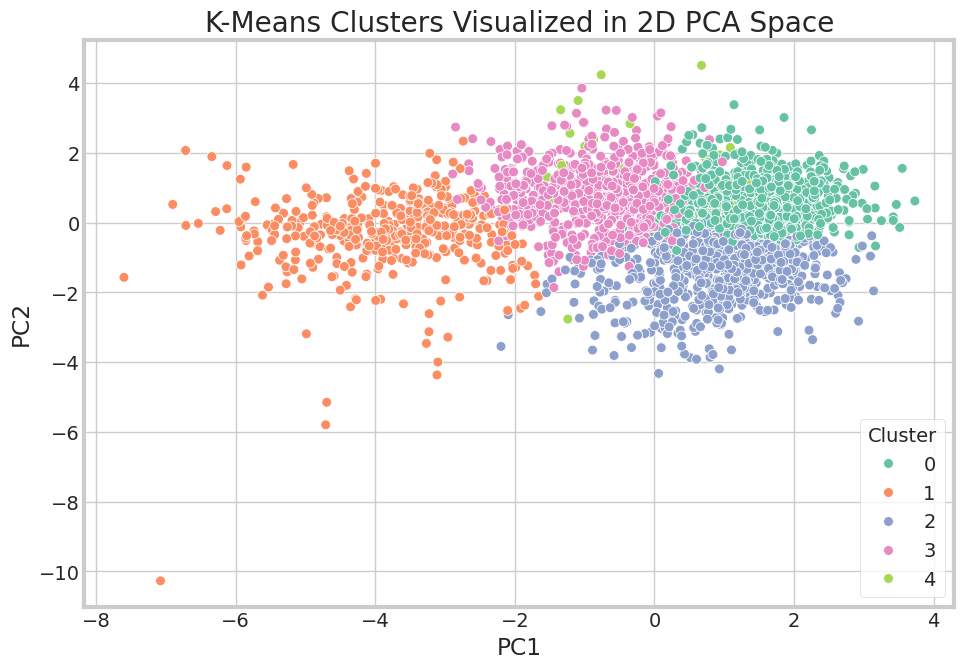

In [84]:
# Using PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=50)
plt.title('K-Means Clusters Visualized in 2D PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()




```

```

## Evaluation

In [85]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for K={kmeans.n_clusters}: {sil_score:.3f}")


Silhouette Score for K=5: 0.156


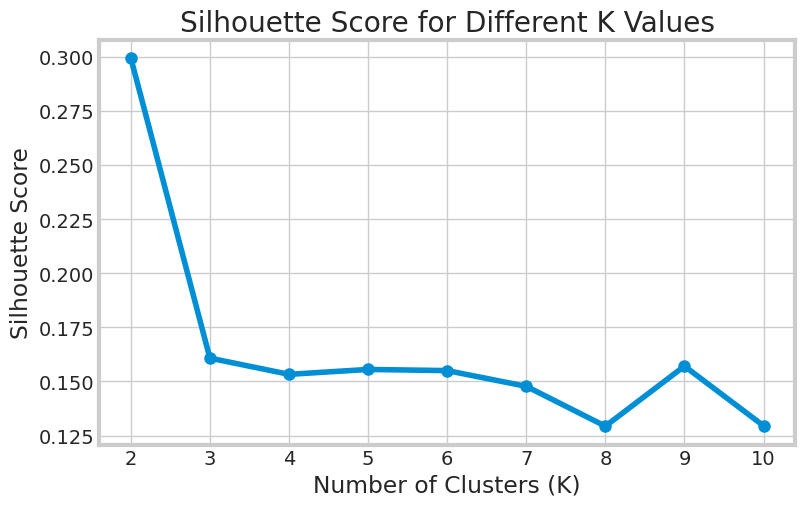

In [86]:
# --- Silhouette Score Analysis ---

# Range of K values to evaluate
K_range = range(2, 11)  # commonly 2–10

sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(list(K_range), sil_scores, marker='o', linestyle='-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.grid(True)
plt.show()



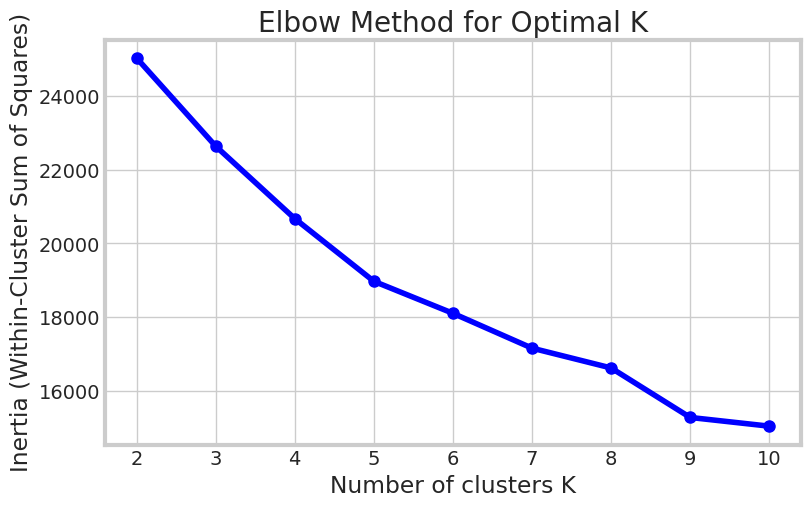

In [87]:
#Elbow Method
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 11)  # Test K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [88]:
# --- Fit final K-Means model with chosen K ---
K_final = 4   # <-- change this to the optimal K based on silhouette/elbow

kmeans = KMeans(n_clusters=K_final, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Count the number of genres in each cluster ---
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts


,count
Cluster,
0,974
1,406
2,832
3,760


## Bonus (Optional)

In [89]:
# -----------------------------
# Bonus: Genre Recommender
# -----------------------------

import random

def genre_recommender(input_genre, df=df, n_recommend=5):
    """
    Recommends similar music genres based on K-Means clusters.

    Parameters:
    - input_genre: str, the genre to base recommendations on
    - df: DataFrame containing 'genres' and 'Cluster'
    - n_recommend: int, number of genres to recommend

    Returns:
    - List of recommended genres
    """
    if input_genre not in df['genres'].values:
        return f"Genre '{input_genre}' not found in the dataset."

    # Find the cluster of the input genre
    cluster_label = df.loc[df['genres'] == input_genre, 'Cluster'].values[0]

    # Get all other genres in the same cluster (exclude the input genre)
    similar_genres = df[df['Cluster'] == cluster_label]['genres'].tolist()
    similar_genres = [g for g in similar_genres if g != input_genre]

    # Randomly sample n_recommend genres
    recommended = random.sample(similar_genres, min(n_recommend, len(similar_genres)))

    return recommended


In [90]:
# Example usage
recommendations = genre_recommender('jazz', n_recommend=5)
print("Recommended genres for 'jazz':", recommendations)


Recommended genres for 'jazz': ['ectofolk', 'chinese audiophile', 'hula', 'outsider', 'macedonian folk']
